# Simple Linear Regression - Numpy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
pwd

'D:\\ALL_CODES_SECTIONWISE\\DSC_CODES\\Data_Science_ML_Based'

In [3]:
df = pd.read_csv('D:\\ALL_CODES_SECTIONWISE\\DSC_CODES\\Data_Science_ML_Based\\Data\\Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<AxesSubplot:>

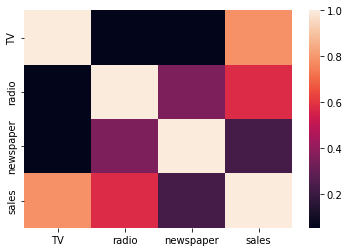

In [5]:
sns.heatmap(df.corr())

In [6]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
df['total_adv_spend'] = df['TV'] + df['radio'] + df['newspaper']

<AxesSubplot:xlabel='total_adv_spend', ylabel='sales'>

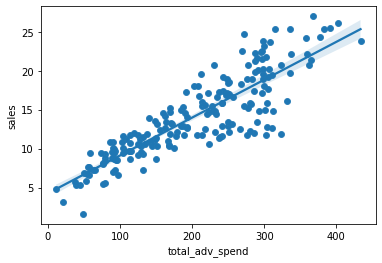

In [8]:
sns.scatterplot(data=df, x = 'total_adv_spend' , y='sales')
sns.regplot(data=df, x = 'total_adv_spend' , y='sales')

In [9]:
X = df['total_adv_spend']
y = df['sales']

In [10]:
X

0      337.1
1      128.9
2      132.4
3      251.3
4      250.0
       ...  
195     55.7
196    107.2
197    192.7
198    391.8
199    249.4
Name: total_adv_spend, Length: 200, dtype: float64

0.048687879319048145 4.2430282160363255


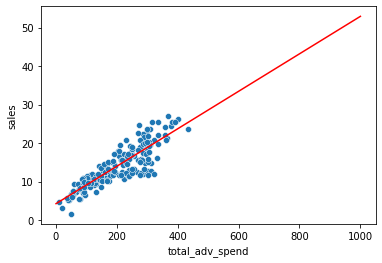

In [11]:
b1 , b0 = np.polyfit(X,y,deg=1)
print(b1 , b0)
potential_spend = np.linspace(1,1000,200)

predicted_sales = b1*potential_spend + b0

sns.scatterplot(data=df, x = 'total_adv_spend' , y='sales')
plt.plot(potential_spend,predicted_sales,color='red')

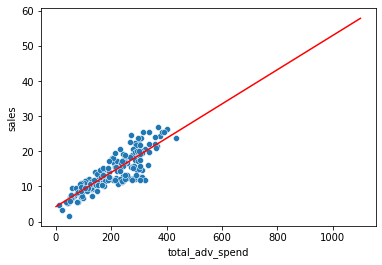

In [12]:
b_higher, b0 = np.polyfit(X,y,deg=1)
test_samples = 200
potential_spend = np.linspace(1,1100,test_samples)

predicted_sales = (b_higher.reshape(-1,1)@potential_spend.reshape(1,test_samples) + b0).reshape(test_samples,) 

sns.scatterplot(data=df, x = 'total_adv_spend' , y='sales')
plt.plot(potential_spend,predicted_sales,color='red')

# Scikit Implementations

In [5]:
df = pd.read_csv('DATA/Advertising.csv')

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<Figure size 1440x576 with 0 Axes>

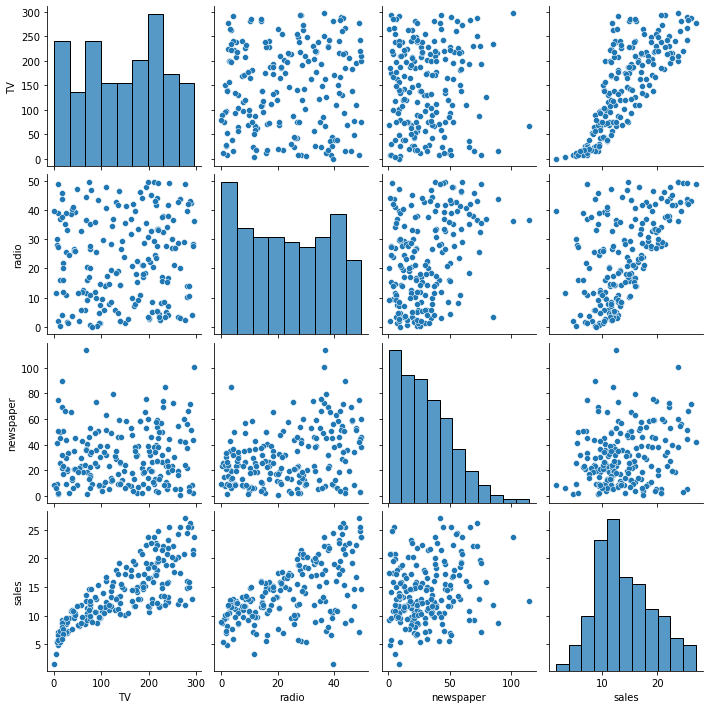

In [7]:
plt.figure(figsize=(20,8))
sns.pairplot(data=df)

<AxesSubplot:>

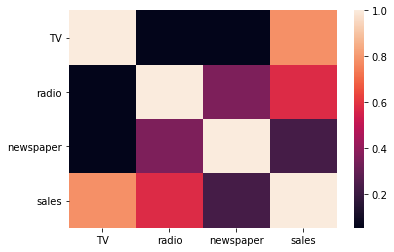

In [8]:
sns.heatmap(df.corr())

In [9]:
X = df.iloc[:,:3].values
y = df.iloc[:,3].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [12]:
X_train.shape

(134, 3)

In [13]:
y_train.shape

(134,)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train,y_train)

LinearRegression()

In [18]:
model.coef_

array([0.04466512, 0.19663006, 0.00607439])

In [19]:
model.intercept_

2.7580716192171053

In [25]:
X_test[0].shape

(3,)

In [29]:
print(np.squeeze(model.predict(X_test[0].reshape(1,3))))

16.58673085223177


In [22]:
import pickle 
with open('model.pkl' , 'wb') as w:
    pickle.dump(model , w )

In [20]:
np.round(model.predict(X_test),2)

array([16.59, 21.19, 21.67, 10.81, 22.25, 13.31, 21.24,  7.38, 13.44,
       15.19,  9.02,  6.57, 14.42,  8.94,  9.56, 12.11,  8.86, 16.25,
       10.31, 18.84, 19.81, 13.68, 12.45, 21.58,  7.67,  5.67, 20.95,
       11.89,  9.13,  8.49, 12.32,  9.99, 21.72, 12.65, 18.25, 20.17,
       14.21, 21.03, 10.92,  4.43,  9.59, 12.53, 10.15,  8.13, 13.33,
        5.28,  9.31, 14.15,  8.76, 11.67, 15.66, 11.75, 13.22, 11.06,
        6.42,  9.85,  9.46, 24.33,  7.69, 12.31, 17.58, 15.28, 11.46,
       11.12, 16.6 ,  6.91])

In [21]:
y_test

array([16.9, 22.4, 21.4,  7.3, 24.7, 12.6, 22.3,  8.4, 11.5, 14.9,  9.5,
        8.7, 11.9,  5.3, 10.3, 11.7,  5.5, 16.6, 11.3, 18.9, 19.7, 12.5,
       10.9, 22.2,  9.3,  8.1, 21.7, 13.4, 10.6,  5.7, 10.6, 11.3, 23.7,
        8.7, 16.1, 20.7, 11.6, 20.8, 11.9,  6.9, 11. , 12.8, 10.1,  9.7,
       11.6,  7.6, 10.5, 14.6, 10.4, 12. , 14.6, 11.7,  7.2,  6.6,  9.4,
       11. , 10.9, 25.4,  7.6, 11.7, 15. , 15.5, 11.9,  9.2, 12.8,  6.6])

### Performace Evaluation
* We can't have Accuracy and all here, as our output data is continuous
* We can use MAE, MSE, etc..
### Metrics

Make sure you've viewed the video on these metrics!
The three most common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [30]:
np.mean(np.abs(np.round(model.predict(X_test),2) - y_test))  # doesn't punish large deviations

1.4936363636363637

In [31]:
np.mean(np.square(np.round(model.predict(X_test),2) - y_test)) # mse

3.7275696969696974

In [32]:
np.sqrt(np.mean(np.square(np.round(model.predict(X_test),2) - y_test))) # rmse

1.9306915074578066

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
mean_absolute_error(np.round(model.predict(X_test),2) , y_test)

1.4936363636363637

In [35]:
np.sqrt(mean_squared_error(np.round(model.predict(X_test),2) , y_test))

1.9306915074578066

In [36]:
df['sales'].mean()

14.0225

<AxesSubplot:xlabel='sales', ylabel='Count'>

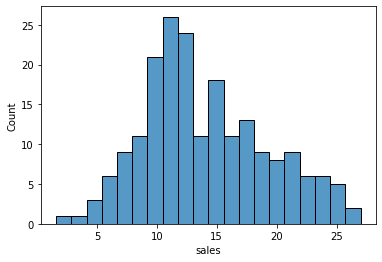

In [37]:
sns.histplot(data=df, x='sales', bins=20)

In [38]:
ss = f"""On data the model hasn't seen before,
it is {np.sqrt(mean_squared_error(np.round(model.predict(X_test),2) , y_test))*100/df['sales'].mean()} percent off on avg"""

In [39]:
print(ss)

On data the model hasn't seen before,
it is 13.768525637067617 percent off on avg


# Residual Plots

* recall Anscombe's quartet ; all four below have same mean & variance ; 
* Also, line of best fit would be the same
* Horrible , right??
* Some of these are not suitable for LR
<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png"></img>

<table class="wikitable">
<tbody><tr>
<th>Property
</th>
<th>Value
</th>
<th>Accuracy
</th></tr>
<tr>
<td><a href="/wiki/Mean" title="Mean">Mean</a> of <i>x</i>
</td>
<td>9
</td>
<td>exact
</td></tr>
<tr>
<td>Sample <a href="/wiki/Variance" title="Variance">variance</a> of <i>x</i>  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \sigma ^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>&#x03C3;<!-- σ --></mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \sigma ^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/53a5c55e536acf250c1d3e0f754be5692b843ef5" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.385ex; height:2.676ex;" alt="\sigma ^{2}"/></span>
</td>
<td>11
</td>
<td>exact
</td></tr>
<tr>
<td>Mean of <i>y</i>
</td>
<td>7.50
</td>
<td>to 2 decimal places
</td></tr>
<tr>
<td>Sample variance of <i>y</i>  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \sigma ^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>&#x03C3;<!-- σ --></mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \sigma ^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/53a5c55e536acf250c1d3e0f754be5692b843ef5" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.385ex; height:2.676ex;" alt="\sigma ^{2}"/></span>
</td>
<td>4.125
</td>
<td>±0.003
</td></tr>
<tr>
<td><a href="/wiki/Correlation" class="mw-redirect" title="Correlation">Correlation</a> between <i>x</i> and <i>y</i>
</td>
<td>0.816
</td>
<td>to 3 decimal places
</td></tr>
<tr>
<td><a href="/wiki/Linear_regression" title="Linear regression">Linear regression</a> line
</td>
<td><i>y</i>&#160;=&#160;3.00&#160;+&#160;0.500<i>x</i>
</td>
<td>to 2 and 3 decimal places, respectively
</td></tr>
<tr>
<td><a href="/wiki/Coefficient_of_determination" title="Coefficient of determination">Coefficient of determination</a> of the linear regression  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle R^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>R</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle R^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5ce07e278be3e058a6303de8359f8b4a4288264a" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.818ex; height:2.676ex;" alt="R^{2}"/></span>
</td>
<td>0.67
</td>
<td>to 2 decimal places
</td></tr></tbody></table>

## Can't visualize for situations with more than 2 features

* What we can do is plot residual errors vs y-values ; That should approx be a Random Normal Distribution

In [40]:
test_residuals = y_test - np.round(model.predict(X_test),2)

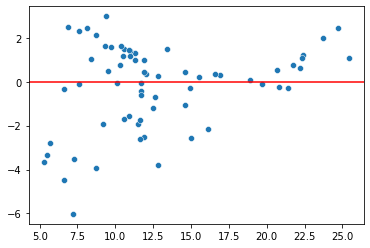

In [41]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0 , color='red')

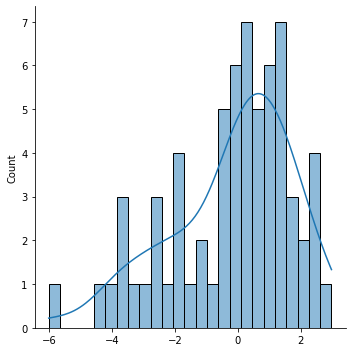

In [42]:
sns.displot(test_residuals, bins=25, kde=True)

In [43]:
import scipy as sp

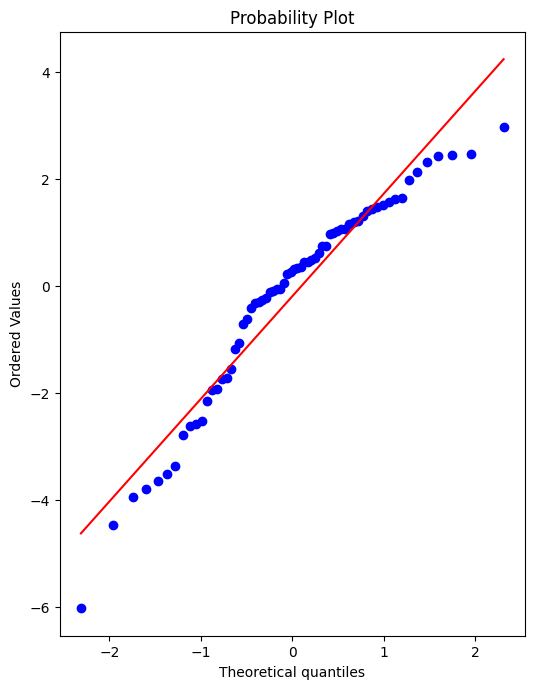

In [44]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals,plot=ax)

# Saving & Loading Models

In [45]:
from joblib import dump, load

In [46]:
mkdir models

A subdirectory or file models already exists.


In [47]:
ls

 Volume in drive D is Storage space
 Volume Serial Number is 54A5-699F

 Directory of D:\ALL_CODES_SECTIONWISE\DSC_CODES\Data_Science_ML_Based

19-10-2021  10:42    <DIR>          .
19-10-2021  10:42    <DIR>          ..
18-10-2021  22:09    <DIR>          .ipynb_checkpoints
06-10-2021  11:49            39,404 001. Numpy Codes.ipynb
15-10-2021  14:30           595,852 002. Pandas Codes.ipynb
16-10-2021  19:50           522,074 003. Matplotlib Codes.ipynb
18-10-2021  20:15         3,448,026 004. Seaborn Codes.ipynb
19-10-2021  10:42           325,781 005. Linear Regression.ipynb
16-10-2021  23:37    <DIR>          books_and_resources
18-10-2021  20:00    <DIR>          DATA
06-10-2021  23:40    <DIR>          Downloads
16-10-2021  22:58    <DIR>          imgs
18-10-2021  23:21    <DIR>          models
18-10-2021  23:26             1,387 readme.md
11-10-2021  23:07                71 sample.csv
               7 File(s)      4,932,595 bytes
               8 Dir(s)  192,444,669,952 bytes fr

In [48]:
dump(model, 'models\\sales_basic_linReg_model.joblib') 

['models\\sales_basic_linReg_model.joblib']

In [49]:
loaded_model = load('models\\sales_basic_linReg_model.joblib')

In [50]:
campaign = [[149,22,12]]
loaded_model.predict(campaign)

array([13.81192861])

In [51]:
model.predict(campaign)

array([13.81192861])

# Polynomial Regression

In [52]:
X = df.iloc[:,:3].values
y = df.iloc[:,3].values

In [53]:
from sklearn.preprocessing import PolynomialFeatures

In [56]:
polynomial_converter = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

### We are generating only AB, AC, BC interaction terms from A,B,C

In [57]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False, interaction_only=True)

In [61]:
poly_feats = polynomial_converter.transform(X)

In [59]:
X.shape

(200, 3)

In [62]:
poly_feats.shape

(200, 6)

In [63]:
X[0]

array([230.1,  37.8,  69.2])

In [64]:
poly_feats[0]

array([  230.1 ,    37.8 ,    69.2 ,  8697.78, 15922.92,  2615.76])

In [65]:
230.1*37.8 # interaction term 1

8697.779999999999

In [66]:
230.1*69.2 # interaction term 2

15922.92

In [67]:
37.8*69.2 # interaction term 3

2615.7599999999998

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to t

In [70]:
X_train, X_test, y_train, y_test = train_test_split(poly_feats, y, test_size=0.33, random_state=42)

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
modelPoly = LinearRegression()

In [73]:
modelPoly.fit(X_train,y_train)

LinearRegression()

In [74]:
test_preds_poly = modelPoly.predict(X_test)

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [76]:
mean_absolute_error(np.round(test_preds_poly,2), y_test)

0.7857575757575759

In [77]:
np.sqrt(mean_squared_error(np.round(test_preds_poly,2), y_test))

1.0243593711252519

### See, the MAE and RMSE have decreased!!

# Bias Variance tradeoff

### Choosing degree of Polynomial!
Are we satisfied with this performance? Perhaps a higher order would improve performance even more! But how high is too high? It is now up to us to possibly go back and adjust our model and parameters, let's explore higher order Polynomials in a loop and plot out their error. This will nicely lead us into a discussion on Overfitting.

Let's use a for loop to do the following:

1. Create different order polynomial X data
2. Split that polynomial data for train/test
3. Fit on the training data
4. Report back the metrics on *both* the train and test results
5. Plot these results and explore overfitting

In [79]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

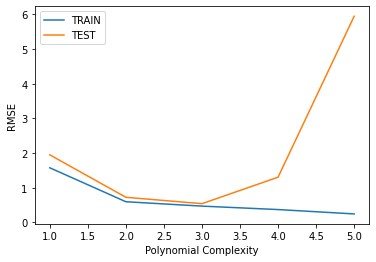

In [80]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

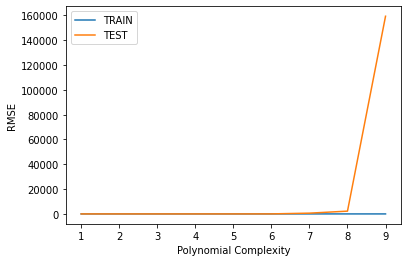

In [81]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

## Finalizing Model Choice

There are now 2 things we need to save, the Polynomial Feature creator AND the model itself. Let's explore how we would proceed from here:

1. Choose final parameters based on test metrics
2. Retrain on all data
3. Save Polynomial Converter object
4. Save model

In [82]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

final_model = LinearRegression()

final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

In [83]:
from joblib import dump, load

In [84]:
ls

 Volume in drive D is Storage space
 Volume Serial Number is 54A5-699F

 Directory of D:\ALL_CODES_SECTIONWISE\DSC_CODES\Data_Science_ML_Based

19-10-2021  12:51    <DIR>          .
19-10-2021  12:51    <DIR>          ..
18-10-2021  22:09    <DIR>          .ipynb_checkpoints
06-10-2021  11:49            39,404 001. Numpy Codes.ipynb
15-10-2021  14:30           595,852 002. Pandas Codes.ipynb
16-10-2021  19:50           522,074 003. Matplotlib Codes.ipynb
18-10-2021  20:15         3,448,026 004. Seaborn Codes.ipynb
19-10-2021  12:51           371,487 005. Linear Regression.ipynb
16-10-2021  23:37    <DIR>          books_and_resources
18-10-2021  20:00    <DIR>          DATA
06-10-2021  23:40    <DIR>          Downloads
16-10-2021  22:58    <DIR>          imgs
18-10-2021  23:21    <DIR>          models
18-10-2021  23:26             1,387 readme.md
11-10-2021  23:07                71 sample.csv
               7 File(s)      4,978,301 bytes
               8 Dir(s)  192,262,316,032 bytes fr

In [85]:
dump(final_model, 'models\\sales_poly_model.joblib') 

['models\\sales_poly_model.joblib']

In [86]:
dump(final_poly_converter,'models\\poly_converter.joblib')

['models\\poly_converter.joblib']

# Regularization with SciKit-Learn


Regularization attempts to minimize the RSS (residual sum of squares) *and* a penalty factor. This penalty factor will penalize models that have coefficients that are too large. Some methods of regularization will actually cause non useful features to have a coefficient of zero, in which case the model does not consider the feature.

Let's explore two methods of regularization, Ridge Regression and Lasso. We'll combine these with the polynomial feature set (it wouldn't be as effective to perform regularization of a model on such a small original feature set of the original X).

In [89]:
df = pd.read_csv('D:\\ALL_CODES_SECTIONWISE\\DSC_CODES\\Data_Science_ML_Based\\Data\\Advertising.csv')

In [90]:
X = df.drop('sales',axis=1)
y = df['sales']

In [91]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Ridge Regression



In [95]:
from sklearn.linear_model import Ridge

In [96]:
ridge_model = Ridge(alpha=10)

In [97]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [98]:
test_predictions = ridge_model.predict(X_test)

In [99]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [100]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [101]:
MAE

0.5774404204714167

In [102]:
MSE

0.8003783071528353

In [103]:
RMSE

0.894638646131965

In [104]:
# Training Set Performance
train_predictions = ridge_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.5288348183025304

### Choosing an alpha value with Cross-Validation


In [105]:
from sklearn.linear_model import RidgeCV

In [116]:
help(RidgeCV)

Help on class RidgeCV in module sklearn.linear_model._ridge:

class RidgeCV(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, _BaseRidgeCV)
 |  RidgeCV(alphas=(0.1, 1.0, 10.0), *, fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, store_cv_values=False, alpha_per_target=False)
 |  
 |  Ridge regression with built-in cross-validation.
 |  
 |  See glossary entry for :term:`cross-validation estimator`.
 |  
 |  By default, it performs efficient Leave-One-Out Cross-Validation.
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alphas : ndarray of shape (n_alphas,), default=(0.1, 1.0, 10.0)
 |      Array of alpha values to try.
 |      Regularization strength; must be a positive float. Regularization
 |      improves the conditioning of the problem and reduces the variance of
 |      the estimates. Larger values specify stronger regularization.
 |      Alpha corresponds to ``1 / (2C)`` in other linear mod

In [106]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error') # neg_mean_absolute_error : higher is better

In [107]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [108]:
ridge_cv_model.alpha_

0.1

In [109]:
test_predictions = ridge_cv_model.predict(X_test)

In [110]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [111]:
MAE

0.4273774884351013

In [112]:
MSE

0.3820129881538421

In [113]:
RMSE

0.6180719926948981

In [114]:
# Training Set Performance
train_predictions = ridge_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.30941321056569865

In [115]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

In [117]:
from sklearn.metrics import SCORERS

In [118]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

## Lasso Regression

In [119]:
from sklearn.linear_model import LassoCV

In [120]:
help(LassoCV)

Help on class LassoCV in module sklearn.linear_model._coordinate_descent:

class LassoCV(sklearn.base.RegressorMixin, LinearModelCV)
 |  LassoCV(*, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', max_iter=1000, tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=None, positive=False, random_state=None, selection='cyclic')
 |  
 |  Lasso linear model with iterative fitting along a regularization path.
 |  
 |  See glossary entry for :term:`cross-validation estimator`.
 |  
 |  The best model is selected by cross-validation.
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=1e-3
 |      Length of the path. ``eps=1e-3`` means that
 |      ``alpha_min / alpha_max = 1e-3``.
 |  
 |  n_alphas : int, default=100
 |      Number of alphas along the regularization p

In [123]:
model_lasso_cv = LassoCV(eps=0.001, n_alphas=100, cv = None  )

In [124]:
model_lasso_cv.fit(X_train,y_train)

D:\Installed\Anaconda\envs\tf2_gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.870440668090918, tolerance: 0.3684261714285715
  model = cd_fast.enet_coordinate_descent(


LassoCV(n_alphas=1000)

In [126]:
model_lasso_cv = LassoCV(eps=0.001, n_alphas=100, cv = None , max_iter=50000 )

In [127]:
model_lasso_cv.fit(X_train,y_train)

LassoCV(max_iter=50000)

In [129]:
model_lasso_cv.alpha_

0.004943070909225833

In [131]:
test_predictions = model_lasso_cv.predict(X_test)

In [132]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [133]:
MAE

0.4335034618590078

In [134]:
RMSE

0.6063140748984043

In [136]:
model_lasso_cv.coef_ # see , a lot of them is zero as it thinks they are shit!

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])

# ElasticNet

In [140]:
from sklearn.linear_model import ElasticNetCV

In [142]:
help(ElasticNetCV)

Help on class ElasticNetCV in module sklearn.linear_model._coordinate_descent:

class ElasticNetCV(sklearn.base.RegressorMixin, LinearModelCV)
 |  ElasticNetCV(*, l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', max_iter=1000, tol=0.0001, cv=None, copy_X=True, verbose=0, n_jobs=None, positive=False, random_state=None, selection='cyclic')
 |  
 |  Elastic Net model with iterative fitting along a regularization path.
 |  
 |  See glossary entry for :term:`cross-validation estimator`.
 |  
 |  Read more in the :ref:`User Guide <elastic_net>`.
 |  
 |  Parameters
 |  ----------
 |  l1_ratio : float or list of float, default=0.5
 |      float between 0 and 1 passed to ElasticNet (scaling between
 |      l1 and l2 penalties). For ``l1_ratio = 0``
 |      the penalty is an L2 penalty. For ``l1_ratio = 1`` it is an L1 penalty.
 |      For ``0 < l1_ratio < 1``, the penalty is a combination of L1 and L2
 |      This parameter can be a li

In [143]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1] , eps=0.001, 
                            n_alphas=100, max_iter=100000)

In [144]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=100000)

In [145]:
elastic_model.l1_ratio_

1.0

In [146]:
test_predictions = elastic_model.predict(X_test)

In [147]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [148]:
MAE

0.4335034618590078

In [149]:
MSE

0.3676167574199078

In [150]:
RMSE

0.6063140748984043

In [151]:
# Training Set Performance
train_predictions = elastic_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.3307056225674498

In [152]:
elastic_model.coef_

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])